In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

pd.options.mode.chained_assignment = None

In [118]:
df = pd.read_json('Data/Lead_DS_arr2.json', orient='values', encoding='utf-8')
df.head()

,Contact,Contractor,Country,CreatedById,CreatedOn,Currency,DateInvite,LeadName,LeadSource,LeadType,...,UsrSTRING,UsrTehSpecialistId,UsrToProdazhaAutorId,UsrTorgDATE,UsrTypeId,UsrURLIcetrade,UsrZadanieDeadLine,UsrZadanieZakupki,UsrZakupNum,Website
0,,,None,ce47f1b8-31d2-4114-bded-50c149b2a8d7,/Date(1535087347272)/,USD,/Date(1536699600000)/,Продажа брендов / Городское клиническое патоло...,из переговоров,Продажа брендов,...,Лезвия одноразовые Горпатбюро 4 квартал,ce47f1b8-31d2-4114-bded-50c149b2a8d7,None,/Date(1539085391000)/,ee429f36-84db-4fe2-8073-bd34c0036a0c,http://www.icetrade.by/tenders/all/view/611418,None,,2018-611418,
1,Елдос,,KAZ,7848733e-d22a-425f-bf86-cb5bbef356ba,/Date(1497594689556)/,USD,None,Продажа Интернет / Елдос,из заявки,Продажа Интернет,...,ADSL/VDSL Тестовый телефон Vesala AP32,None,d13c5c83-c9ea-4971-961a-c36b32344359,None,None,,None,,,
2,Селицкая Зинаида Петровна,БЕЛАЗ,BLR,fe942299-3c67-42f4-8375-8b411f92b0f8,/Date(1508405173000)/,USD,None,"Продажа товаров / Селицкая Зинаида Петровна, Б...",из тендера,Продажа товаров,...,Закупка портативного устройства ударно-точечно...,None,None,None,a2342979-1e6f-4d4b-83dd-4b2f65d1fb35,http://www.icetrade.by/tenders/all/view/493789,None,,2017-493789,http://www.icetrade.by/tenders/all/view/493789
3,Худолей А.Л.,ИТМО,None,12fb6add-601a-4280-ab7c-9f50db13cfeb,/Date(1501785633000)/,USD,None,"Продажа товаров / Худолей А.Л., ИТМО",из заявки,Продажа товаров,...,реометр фирмы Anton Paar,2fb35800-c748-4206-a08d-c07e53263f49,None,None,ee429f36-84db-4fe2-8073-bd34c0036a0c,,None,Anton Paar на территории СНГ представляют русс...,,
4,,Techlab,None,84efa895-6df0-4663-b005-f49e39193128,/Date(1536242991130)/,USD,None,Продажа товаров / TECHLAB,из переговоров,Продажа товаров,...,Лента латунная Inter ISO CuZn,84efa895-6df0-4663-b005-f49e39193128,None,None,None,,/Date(1536786000000)/,Получить КП,,


In [119]:
df.columns

Index(['Contact', 'Contractor', 'Country', 'CreatedById', 'CreatedOn',
       'Currency', 'DateInvite', 'LeadName', 'LeadSource', 'LeadType',
       'ModifiedById', 'ModifiedOn', 'Notes', 'OpportunityId', 'OwnerId',
       'QStatus', 'QualifiedAccountId', 'QualifiedContactId', 'SdelkaId',
       'StatusId', 'USRLeadCode', 'UsrAmount', 'UsrAnalizComment',
       'UsrAnalizGotov', 'UsrBudgetUsd', 'UsrKvalification',
       'UsrKvalificationDone', 'UsrLeadCloseAutorId',
       'UsrLidDescriptionSTRING', 'UsrLotNumber', 'UsrOrganizatorId',
       'UsrOtchetDate', 'UsrPodachaDATE', 'UsrPrichina', 'UsrPrimaryAmount',
       'UsrProduct', 'UsrSTRING', 'UsrTehSpecialistId', 'UsrToProdazhaAutorId',
       'UsrTorgDATE', 'UsrTypeId', 'UsrURLIcetrade', 'UsrZadanieDeadLine',
       'UsrZadanieZakupki', 'UsrZakupNum', 'Website'],
      dtype='object')

In [ ]:
df['Code'] = df.USRLeadCode

In [179]:
def ConvertToDateTimeSeries(df, sOldName, sNewName):
    df[sNewName] = df[sOldName].str.replace('/Date(', '', regex=False).str.replace(')/', '', regex=False)
    df[sNewName+"Num"] = pd.to_numeric( df[sNewName])
    df[sNewName] = pd.to_datetime(df[sNewName+"Num"],  unit='ms' )
    




#vals_to_replace = {'/Date(':'', ')/':''}
#df['CreatedOn1'] = df['CreatedOn'].str.replace('/Date(', '', regex=False).str.replace(')/', '', regex=False)
#df['CreatedNum'] = pd.to_numeric( df['CreatedOn1'])
#df['CreatedOn1'] = pd.to_datetime(df.CreatedNum,  unit='ms' )
ConvertToDateTimeSeries(df, 'CreatedOn', 'CreatedOn1')
ConvertToDateTimeSeries(df, 'ModifiedOn', 'ModifiedOn1')

df.ModifiedOn1.dtype




dtype('<M8[ns]')

In [137]:
df1 = df[df.UsrAmount < max(df.UsrAmount)/1000]

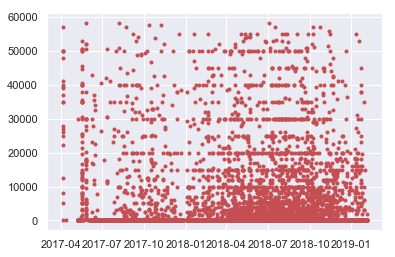

In [138]:


plt.plot(df1.CreatedOn1, df1.UsrAmount, 'r.')

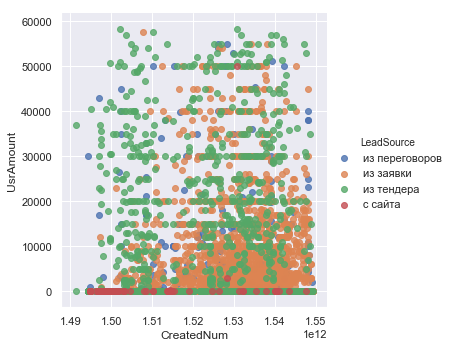

In [143]:
#df1['LeadSourceCat'] = pd.Series(list(df1.LeadSource), dtype='category')
#df1['LeadSourceNum'] = df1['LeadSourceCat'].cat.codes

#df1['LeadSourceCat'] = df1['LeadSource'].map({'из заявки': 0, 'из тендера': 1, 'из плана': 2, 'из переговоров': 3, 'с сайта': 4})

# remove cat - из плана

df1 = df1[df1.LeadSource != 'из плана']

sns.lmplot( x='CreatedNum', y='UsrAmount', data=df1, fit_reg=False, hue='LeadSource', legend=True)



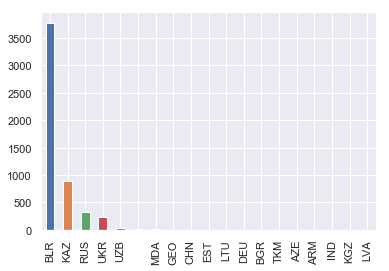

In [8]:
df.Country.value_counts().plot(kind='bar')

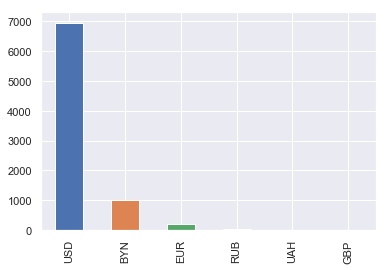

In [15]:
df.Currency.value_counts().plot(kind='bar')

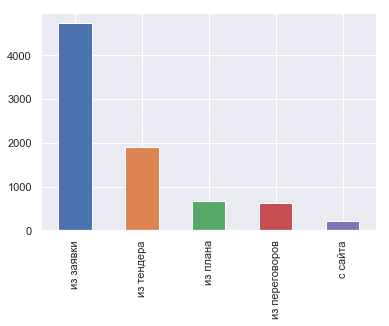

In [16]:
df.LeadSource.value_counts().plot(kind='bar')

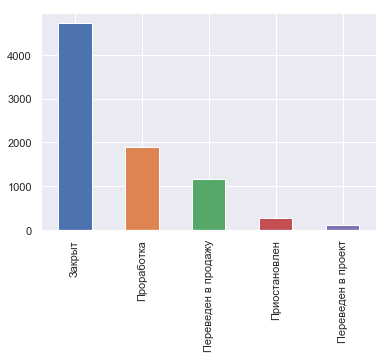

In [7]:
df.QStatus.value_counts().plot(kind='bar')

In [100]:
gr1 = df.groupby(['QStatus', 'LeadSource'])
gr1.shape

AttributeError: Cannot access attribute 'shape' of 'DataFrameGroupBy' objects, try using the 'apply' method

    For status - Prorabotka

(1894, 52)


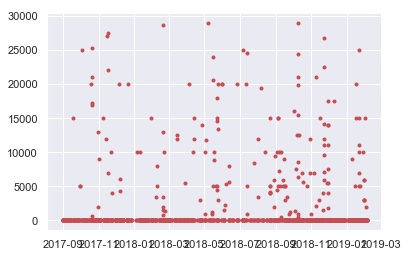

In [180]:
df2 = df[df.QStatus=='Проработка']
print(df2.shape)
df3 = df2[df2.UsrAmount < max(df2.UsrAmount)/1000]
plt.plot(df3.CreatedOn1, df3.UsrAmount, 'r.')

    Calculate how long leads on this status

int64


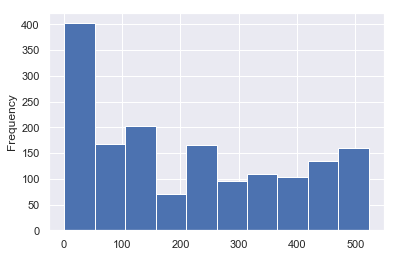

In [181]:
df3['HowLongFromCreated'] = (pd.datetime.now().date() - pd.to_datetime(df3.CreatedOn1).dt.date).dt.days
print(df3.HowLongFromCreated.dtype)
df3.HowLongFromCreated.plot.hist(bins=10)

int64


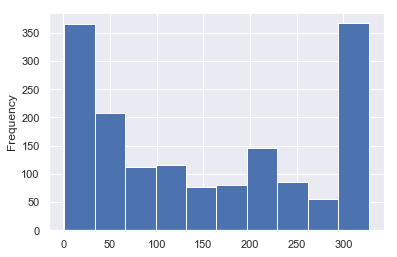

In [182]:
df3['HowLongFromModified'] = (pd.datetime.now().date() - pd.to_datetime(df3.ModifiedOn1).dt.date).dt.days
print(df3.HowLongFromModified.dtype)
df3.HowLongFromModified.plot.hist(bins=10)